In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

img = load_img('C:\\Users\\tiger\\Deeplearning\\images\\dogs-vs-cats\\train\\cat\\cat.1.jpg')
x = img_to_array(img)

# x.reshape((1,))은 batch deension을 포함, fit input_shape는 배치차원(batch demension)을 포함되지 않음

x = x.reshape((1,) + x.shape)

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1, 
                          save_to_dir='C:\\Users\\tiger\\Deeplearning\\images\\dogs-vs-cats\\training_set\\preview',
                          save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 24:
        break

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

np.random.seed(0)
tf.random.set_seed(0)

rootPath = "C:\\Users\\tiger\\Deeplearning\\images\\dogs-vs-cats"

ImageDataGenerator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=20,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        brightness_range=[.2, .2],
                                        validation_split=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

In [2]:
print(len(os.listdir('./images/dogs-vs-cats/train/cat')))
print(len(os.listdir('./images/dogs-vs-cats/train/dog')))

12500
12500


In [3]:
trainGen = ImageDataGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(128,128),
    class_mode='binary',
    subset='training')

validationGen = ImageDataGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(128,128),
    class_mode='binary',
    subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in trainGen:
    print("Data 크기 : ", data_batch.shape)
    print("Batch 크기 : ", labels_batch.shape)
    break

Data 크기 :  (32, 128, 128, 3)
Batch 크기 :  (32,)


In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
import keras
'''
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
'''
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(patience=5)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [17]:
epochs=128

history = model.fit(trainGen, validation_data=validationGen, steps_per_epoch=(trainGen.samples*4) / epochs, 
                    validation_steps=(validationGen.samples*4) / epochs, epochs=epochs,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/128
625/625 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.7552
Epoch 00001: val_loss did not improve from 0.50217
625/625 [==============================] - 363s 582ms/step - loss: 0.5016 - accuracy: 0.7552 - val_loss: 0.5932 - val_accuracy: 0.7272
Epoch 2/128
625/625 [==============================] - ETA: 0s - loss: 0.4674 - accuracy: 0.7789
Epoch 00002: val_loss did not improve from 0.50217
625/625 [==============================] - 354s 566ms/step - loss: 0.4674 - accuracy: 0.7789 - val_loss: 0.5701 - val_accuracy: 0.7172
Epoch 3/128
625/625 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.7982
Epoch 00003: val_loss improved from 0.50217 to 0.44399, saving model to ./model\03-0.4440-0.8020.hdf5
625/625 [==============================] - 353s 565ms/step - loss: 0.4420 - accuracy: 0.7982 - val_loss: 0.4440 - val_accuracy: 0.8020
Epoch 4/128
625/625 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.8100
Epo

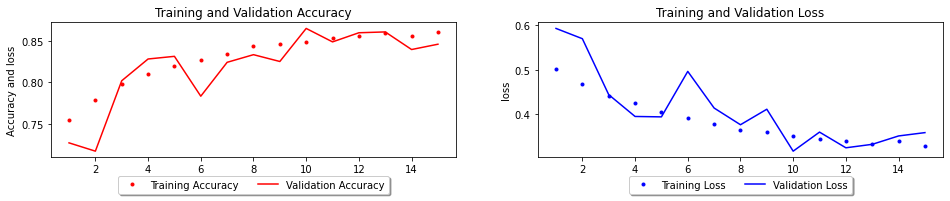

In [27]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 1))
plt.subplot(121)
plt.subplots_adjust(top=2)
plt.plot(epochs, acc, 'r.', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)


plt.subplot(122)
plt.plot(epochs, loss, 'b.', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.show()

In [28]:
loss, acc = model.evaluate(validationGen, workers=4)

print(f'test loss : {loss:.4f} / test acc : {acc*100:.2f} %')

157/157 [==============================] - 14s 88ms/step - loss: 0.3513 - accuracy: 0.8422
test loss : 0.3513 / test acc : 84.22 %
